In [9]:
import numpy as np
import pandas as pd
from openpyxl import Workbook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
length = 1000
size_1 = np.arange(-10, 10, 0.5)
std_1 = 0.2
size_2 = np.arange(-10, 10, 1)
std_2 = 1

rows = []

for j in range(len(size_2)):
    for i in size_1:
        for _ in range(length):
            rows.append([j, i, std_1, size_2[j], std_2])

df = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])

filename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet.csv"
df.to_csv(filename, index=False)

print("Fichier généré :", filename)


Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet.csv


In [17]:
def psycometrique(data_tuple,var2, nb_psycho):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 41           # nb de valeurs de S2 par courbe
    nuber_big_blocs = nb_psycho
    size_one_block = block_size * big_blocs  
    for l in range(nuber_big_blocs-1):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*l + i : size_one_block*l + i + block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*l + i : size_one_block*l + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
        
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)  
    number_of_psycho = df['Trial'].to_numpy()
    number_of_psycho = pd.unique(number_of_psycho)
    
    return list(var2), len(list(number_of_psycho))         


def ploter(mean_used_all, mean_res_all):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {idx - 10}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show() 
    
    return x_stars




def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple



def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2, nb_psycho = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2, nb_psycho)
    x_stars = ploter(array_mean_used, array_mean_result)

    print("x_stars :", x_stars)
    return x_stars

test
800000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -1.086
Bloc 2 : x = -9.011
Bloc 3 : x = -8.037
Bloc 4 : x = -7.015
Bloc 5 : x = -6.012
Bloc 6 : x = -4.984
Bloc 7 : x = -3.981
Bloc 8 : x = -2.983
Bloc 9 : x = -2.000
Bloc 10 : x = -1.035
Bloc 11 : x = -0.033
Bloc 12 : x = 1.008
Bloc 13 : x = 2.028
Bloc 14 : x = 2.985
Bloc 15 : x = 4.012
Bloc 16 : x = 4.993
Bloc 17 : x = 6.043
Bloc 18 : x = 7.010
Bloc 19 : x = 7.987


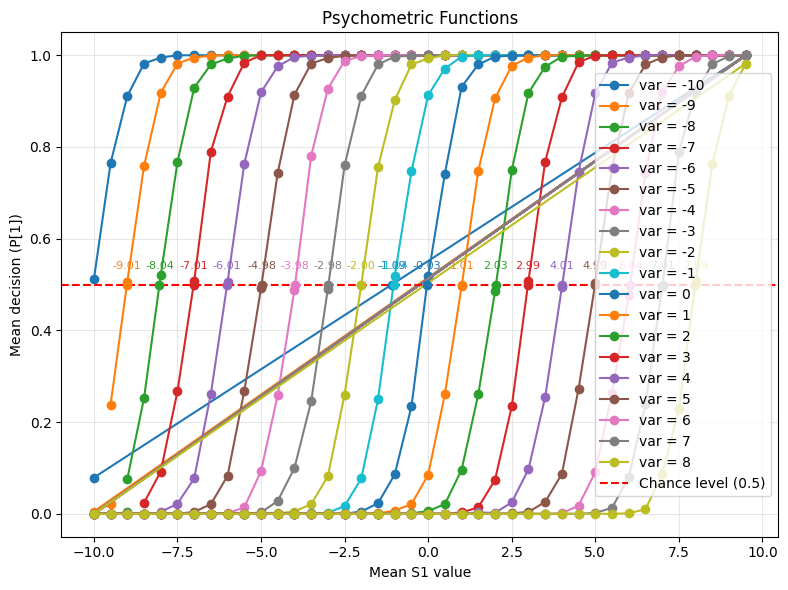

x_stars : [-1.0863192182410426, -9.011194029850746, -8.037313432835822, -7.014583333333333, -6.012295081967213, -4.984126984126984, -3.981164383561644, -2.983271375464684, -2.0, -1.0353159851301115, -0.03333333333333338, 1.007936507936508, 2.028409090909091, 2.9854014598540144, 4.011904761904762, 4.993478260869566, 6.043071161048689, 7.010169491525423, 7.987455197132617]
[-1.0863192182410426, -9.011194029850746, -8.037313432835822, -7.014583333333333, -6.012295081967213, -4.984126984126984, -3.981164383561644, -2.983271375464684, -2.0, -1.0353159851301115, -0.03333333333333338, 1.007936507936508, 2.028409090909091, 2.9854014598540144, 4.011904761904762, 4.993478260869566, 6.043071161048689, 7.010169491525423, 7.987455197132617]


In [19]:
inverser = True
file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\experiment_results_test_complet.csv"
x_stars = main(file_path=file, inverser=inverser)
print(x_stars)
    
    

[-9.011194029850746, -8.037313432835822, -7.014583333333333, -6.012295081967213, -4.984126984126984, -3.981164383561644, -2.983271375464684, -2.0, -1.0353159851301115, -0.03333333333333338, 1.007936507936508, 2.028409090909091, 2.9854014598540144, 4.011904761904762, 4.993478260869566, 6.043071161048689, 7.010169491525423, 7.987455197132617]
(18, 1) (18,)

===== RESULTS =====
Slope a = 1.0013588617626181
Offset b = -0.0006967918088687242


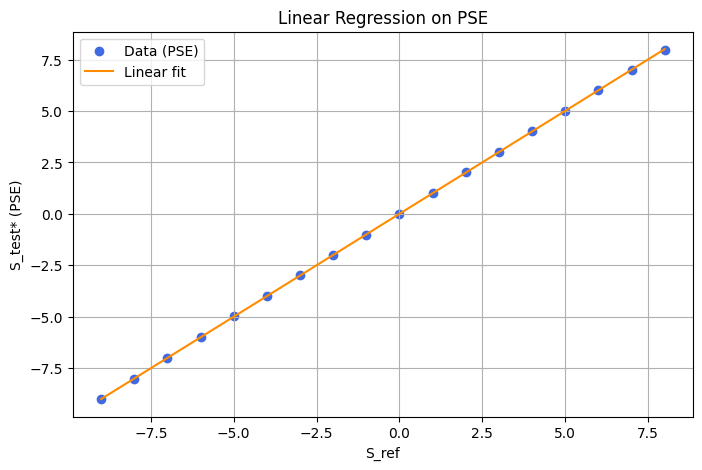

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# --- Tes données doivent déjà exister ---
# vals  : les valeurs de S_ref
# x_stars : les PSE trouvées pour chaque S_ref
x_stars_clean = x_stars[1:]  # On enlève le premier
print(x_stars_clean)
# vals de -9 à 8 (18 valeurs)
vals = np.arange(-9, 9, 1)  # Cela donne -9 à 8 inclus
X = np.array(vals).reshape(-1, 1)
y = np.array(x_stars_clean)
print(X.shape, y.shape)
# Régression linéaire
reg = LinearRegression().fit(X, y)

a = reg.coef_[0]       # pente
b = reg.intercept_     # offset

print("\n===== RESULTS =====")
print("Slope a =", a)
print("Offset b =", b)

# --- PLOT ---
plt.figure(figsize=(8,5))
plt.scatter(vals, x_stars_clean, color="royalblue", label="Data (PSE)")
plt.plot(vals, reg.predict(X), color="darkorange", label="Linear fit")

plt.xlabel("S_ref")
plt.ylabel("S_test* (PSE)")
plt.title("Linear Regression on PSE")
plt.legend()
plt.grid(True)
plt.show()


In [46]:
def compute_tau_p(alpha, tau_test, tau_ref):
    numerator = tau_test * tau_ref * (1 - alpha)
    denominator = alpha * tau_test - tau_ref
    return numerator / denominator

def compute_mu_p(tp, tref, ttest, beta):
    val = (tp * (ttest - tref)) / (ttest*(tref + tp))
    return beta / val
    
a = reg.coef_[0]       # pente
b = reg.intercept_  
internal_std = 0.47
ttest = 1/(internal_std)
tref = 1/(internal_std)
alpha = a
beta = b
tp = compute_tau_p(alpha, ttest, tref)
mean = compute_mu_p(tp, tref, ttest, beta)
print("tp =", tp)
print("std= " , (1/(tp**0.5)))
print("var", 1/tp)

tp = -2.1276595744681823
std=  nan
var -0.46999999999997855


C:\Users\gabri\AppData\Local\Temp\ipykernel_85776\2968670132.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return beta / val
C:\Users\gabri\AppData\Local\Temp\ipykernel_85776\2968670132.py:20: RuntimeWarning: invalid value encountered in scalar power
  print("std= " , (1/(tp**0.5)))


In [44]:
print("mean =", mean)

mean = inf


In [48]:
def psycometrique(data_tuple,var2, nb_psycho):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 41           # nb de valeurs de S2 par courbe
    nuber_big_blocs = nb_psycho
    size_one_block = block_size * big_blocs  
    for l in range(nuber_big_blocs-1):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*l + i : size_one_block*l + i + block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*l + i : size_one_block*l + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
        
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)  
    number_of_psycho = df['Trial'].to_numpy()
    number_of_psycho = pd.unique(number_of_psycho)
    
    return list(var2), len(list(number_of_psycho))         


def ploter(mean_used_all, mean_res_all):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")
    psycho = []
    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {idx - 10}')
        color = line.get_color()
        psycho.append((x_vals, y_vals))
        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show() 
    
    return x_stars , psycho




def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple



def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2, nb_psycho = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2, nb_psycho)
    x_stars , psycho = ploter(array_mean_used, array_mean_result)

    print("x_stars :", x_stars)
    return x_stars , psycho

test
800000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : x = -1.086
Bloc 2 : x = -9.011
Bloc 3 : x = -8.037
Bloc 4 : x = -7.015
Bloc 5 : x = -6.012
Bloc 6 : x = -4.984
Bloc 7 : x = -3.981
Bloc 8 : x = -2.983
Bloc 9 : x = -2.000
Bloc 10 : x = -1.035
Bloc 11 : x = -0.033
Bloc 12 : x = 1.008
Bloc 13 : x = 2.028
Bloc 14 : x = 2.985
Bloc 15 : x = 4.012
Bloc 16 : x = 4.993
Bloc 17 : x = 6.043
Bloc 18 : x = 7.010
Bloc 19 : x = 7.987


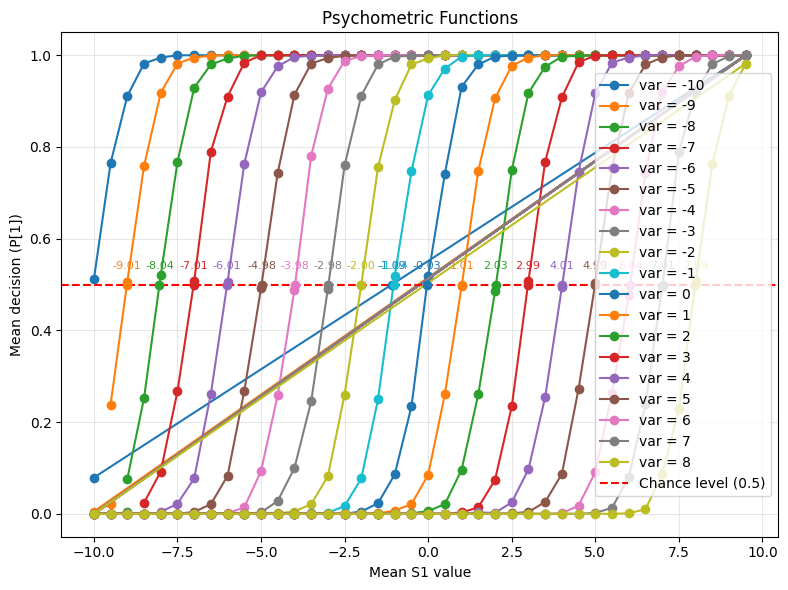

x_stars : [-1.0863192182410426, -9.011194029850746, -8.037313432835822, -7.014583333333333, -6.012295081967213, -4.984126984126984, -3.981164383561644, -2.983271375464684, -2.0, -1.0353159851301115, -0.03333333333333338, 1.007936507936508, 2.028409090909091, 2.9854014598540144, 4.011904761904762, 4.993478260869566, 6.043071161048689, 7.010169491525423, 7.987455197132617]
[-1.0863192182410426, -9.011194029850746, -8.037313432835822, -7.014583333333333, -6.012295081967213, -4.984126984126984, -3.981164383561644, -2.983271375464684, -2.0, -1.0353159851301115, -0.03333333333333338, 1.007936507936508, 2.028409090909091, 2.9854014598540144, 4.011904761904762, 4.993478260869566, 6.043071161048689, 7.010169491525423, 7.987455197132617]


In [49]:
inverser = True
file = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\experiment_results_test_complet.csv"
x_stars, psycho = main(file_path=file, inverser=inverser)
print(x_stars)

    

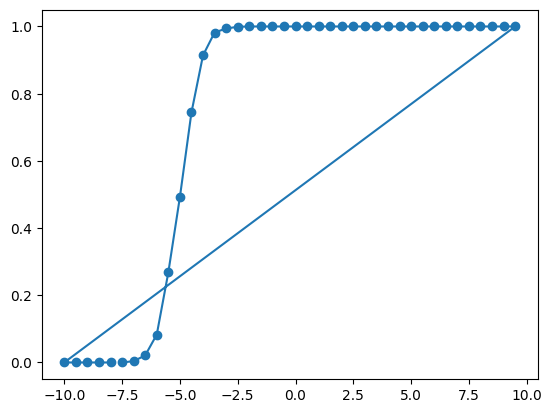

In [60]:
X = psycho[5][0]
Y = psycho[5][1] # si toutes les lignes ont la même taille
X = X[:-1]
Y = Y[:-1]
plt.plot(X, Y, 'o-')


In [62]:
length = 1000
size_1 = np.arange(-1, 1, 0.1)
std_1 = 0.0
size_2 = np.arange(-10, 10, 1)
std_2 = 0.0

rows = []

for j in range(len(size_2)):
    for i in size_1:
        for _ in range(length):
            rows.append([j, i, std_1, size_2[j], std_2])

df = pd.DataFrame(rows, columns=["trials", "S1_val", "S1_std", "S2_val", "S2_std"])

filename = "C:\\Users\\gabri\\Desktop\\bayesian\\test\\test_complet0 - Copy.csv"
df.to_csv(filename, index=False)

print("Fichier généré :", filename)


Fichier généré : C:\Users\gabri\Desktop\bayesian\test\test_complet0 - Copy.csv
